In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
comps = pd.read_csv('meta_data/Competitions.csv')
tags = pd.read_csv('meta_data/CompetitionTags.csv')
teams = pd.read_csv('meta_data/Teams.csv',low_memory=False)
subs = pd.read_csv('meta_data/Submissions.csv')

In [3]:
print(comps.shape)
print(tags.shape)
print(teams.shape)
print(subs.shape)

(5576, 42)
(793, 3)
(6180319, 14)
(12130309, 11)


In [4]:
comps.DeadlineDate = pd.to_datetime(comps.DeadlineDate)
comps['year'] = comps.DeadlineDate.dt.year

In [5]:
comps.groupby('year').count().Title

year
2010       9
2011      18
2012      54
2013      56
2014      61
2015      78
2016     122
2017     279
2018     584
2019     965
2020    1385
2021    1320
2022     621
2023      24
Name: Title, dtype: int64

In [6]:
comps[comps.Title=='SIIM-FISABIO-RSNA COVID-19 Detection'] #Kaggle comp we are looking at, used to verify stuff.

,Id,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,EnabledDate,DeadlineDate,ProhibitNewEntrantsDeadlineDate,...,TotalTeams,TotalCompetitors,TotalSubmissions,ValidationSetName,ValidationSetValue,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,HostName,CompetitionTypeId,year
4001,26680,siim-covid19-detection,SIIM-FISABIO-RSNA COVID-19 Detection,Identify and localize COVID-19 abnormalities o...,Featured,1366504,2734.0,05/18/2021 00:03:39,2021-08-09 23:59:00,08/02/2021 23:59:00,...,1305,1786,32307,NaN,NaN,False,False,NaN,1,2021


In [7]:
j_df = pd.merge(comps, tags, left_on='Id', right_on='CompetitionId', how='inner', validate='m:m') #m:m a comp can have many tags, and a tag can belong to many comps
comps.shape,j_df.shape #There are a considerable number of untagged competitions...
793/5576

0.14221664275466284

In [8]:
j_df.groupby('year').count().Title

year
2013      3
2014      3
2015     80
2016     78
2017     85
2018     60
2019    104
2020     98
2021    120
2022    111
2023     51
Name: Title, dtype: int64

In [9]:
j_df[j_df.Title=='SIIM-FISABIO-RSNA COVID-19 Detection'] #Expect 2: image, multilabel classification
#There is a third tag online, but this seems to be a non-standard one, and doesn't appear.

,Id_x,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,EnabledDate,DeadlineDate,ProhibitNewEntrantsDeadlineDate,...,ValidationSetName,ValidationSetValue,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,HostName,CompetitionTypeId,year,Id_y,CompetitionId,TagId
595,26680,siim-covid19-detection,SIIM-FISABIO-RSNA COVID-19 Detection,Identify and localize COVID-19 abnormalities o...,Featured,1366504,2734.0,05/18/2021 00:03:39,2021-08-09 23:59:00,08/02/2021 23:59:00,...,NaN,NaN,False,False,NaN,1,2021,829,26680,14102
596,26680,siim-covid19-detection,SIIM-FISABIO-RSNA COVID-19 Detection,Identify and localize COVID-19 abnormalities o...,Featured,1366504,2734.0,05/18/2021 00:03:39,2021-08-09 23:59:00,08/02/2021 23:59:00,...,NaN,NaN,False,False,NaN,1,2021,830,26680,16636


In [10]:
j_df[j_df.Title=='RSNA 2022 Cervical Spine Fracture Detection'] #expect 3 tags: image, binary classification, computervision

,Id_x,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,EnabledDate,DeadlineDate,ProhibitNewEntrantsDeadlineDate,...,ValidationSetName,ValidationSetValue,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,HostName,CompetitionTypeId,year,Id_y,CompetitionId,TagId
720,36363,rsna-2022-cervical-spine-fracture-detection,RSNA 2022 Cervical Spine Fracture Detection,Identify cervical fractures from scans,Featured,2147844,1817.0,07/28/2022 17:49:51,2022-10-27 23:59:00,10/20/2022 23:59:00,...,NaN,NaN,False,False,NaN,1,2022,1023,36363,13207
721,36363,rsna-2022-cervical-spine-fracture-detection,RSNA 2022 Cervical Spine Fracture Detection,Identify cervical fractures from scans,Featured,2147844,1817.0,07/28/2022 17:49:51,2022-10-27 23:59:00,10/20/2022 23:59:00,...,NaN,NaN,False,False,NaN,1,2022,994,36363,14102
722,36363,rsna-2022-cervical-spine-fracture-detection,RSNA 2022 Cervical Spine Fracture Detection,Identify cervical fractures from scans,Featured,2147844,1817.0,07/28/2022 17:49:51,2022-10-27 23:59:00,10/20/2022 23:59:00,...,NaN,NaN,False,False,NaN,1,2022,995,36363,14201


In [11]:
j_df[j_df.Title=='Data Science Bowl 2017'] #image comp that is not a code comp. tags: image, binaryclassification, healthcare

,Id_x,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,EnabledDate,DeadlineDate,ProhibitNewEntrantsDeadlineDate,...,ValidationSetName,ValidationSetValue,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,HostName,CompetitionTypeId,year,Id_y,CompetitionId,TagId
186,6004,data-science-bowl-2017,Data Science Bowl 2017,Can you improve lung cancer detection?,Featured,2363,360.0,01/12/2017 14:00:00,2017-04-12 23:59:00,03/31/2017 23:59:00,...,NaN,NaN,False,False,NaN,1,2017,96,6004,4202
187,6004,data-science-bowl-2017,Data Science Bowl 2017,Can you improve lung cancer detection?,Featured,2363,360.0,01/12/2017 14:00:00,2017-04-12 23:59:00,03/31/2017 23:59:00,...,NaN,NaN,False,False,NaN,1,2017,94,6004,14102
188,6004,data-science-bowl-2017,Data Science Bowl 2017,Can you improve lung cancer detection?,Featured,2363,360.0,01/12/2017 14:00:00,2017-04-12 23:59:00,03/31/2017 23:59:00,...,NaN,NaN,False,False,NaN,1,2017,97,6004,14201


So tag 14102 is for image competitions as it is present in all of these cases

In [12]:
image = j_df[j_df.TagId==14102].copy().reset_index(drop=True)
image.shape #108 image-tagged competitions

(108, 46)

In [13]:
image.DeadlineDate

0     2017-01-07 00:00:00
1     2017-01-07 00:00:00
2     2015-03-16 23:59:00
3     2015-07-27 23:59:00
4     2015-10-05 23:59:00
              ...        
103   2022-06-02 23:59:00
104   2022-05-30 23:59:00
105   2022-10-27 23:59:00
106   2022-10-10 23:59:00
107   2022-10-05 23:59:00
Name: DeadlineDate, Length: 108, dtype: datetime64[ns]

In [14]:
#image['year'] = image.DeadlineDate.dt.year

In [15]:
image.groupby('year').count().CompetitionId

year
2015     3
2016     7
2017    19
2018    13
2019    19
2020    16
2021    17
2022    14
Name: CompetitionId, dtype: int64

In [16]:
image[image.OnlyAllowKernelSubmissions].year.unique()    ## Is a kernal only the same as a code competition?
                                                ## The dates seem to match.

array([2019, 2021, 2020, 2022])

In [17]:
image[image.OnlyAllowKernelSubmissions].groupby('year').count().CompetitionId

year
2019     6
2020     9
2021    12
2022     9
Name: CompetitionId, dtype: int64

In [18]:
image[image.OnlyAllowKernelSubmissions== False].groupby('year').count().CompetitionId

year
2015     3
2016     7
2017    19
2018    13
2019    13
2020     7
2021     5
2022     5
Name: CompetitionId, dtype: int64

In [19]:
image = image[image.year>2018]
image.shape[0]

66

In [20]:
image[image.OnlyAllowKernelSubmissions]

,Id_x,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,EnabledDate,DeadlineDate,ProhibitNewEntrantsDeadlineDate,...,ValidationSetName,ValidationSetValue,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,HostName,CompetitionTypeId,year,Id_y,CompetitionId,TagId
47,10686,petfinder-adoption-prediction,PetFinder.my Adoption Prediction,How cute is that doggy in the shelter?,Featured,106880,2170.0,12/27/2018 18:52:10,2019-04-10 01:09:00,03/21/2019 23:59:00,...,NaN,NaN,False,False,NaN,1,2019,455,10686,14102
49,13251,imet-2019-fgvc6,iMet Collection 2019 - FGVC6,Recognize artwork attributes from The Metropol...,Research,161849,2567.0,03/28/2019 15:05:58,2019-06-10 22:09:06,05/28/2019 23:59:00,...,NaN,NaN,False,False,NaN,1,2019,495,13251,14102
51,13435,aerial-cactus-identification,Aerial Cactus Identification,Determine whether an image contains a columnar...,Playground,144645,4.0,03/08/2019 19:22:51,2019-07-08 23:59:00,NaN,...,NaN,NaN,False,False,NaN,1,2019,484,13435,14102
54,13836,cassava-leaf-disease-classification,Cassava Leaf Disease Classification,Identify the type of disease present on a Cass...,Research,1000771,3758.0,11/19/2020 21:12:46,2021-02-18 23:59:00,02/11/2021 23:59:00,...,NaN,NaN,False,False,NaN,1,2021,754,13836,14102
55,14241,severstal-steel-defect-detection,Severstal: Steel Defect Detection,Can you detect and classify defects in steel?,Featured,288048,2888.0,07/25/2019 21:10:14,2019-10-24 23:59:00,10/17/2019 23:59:00,...,NaN,NaN,False,False,NaN,1,2019,538,14241,14102
60,14774,aptos2019-blindness-detection,APTOS 2019 Blindness Detection,Detect diabetic retinopathy to stop blindness ...,Featured,260503,2931.0,06/28/2019 01:15:11,2019-09-07 23:59:00,08/29/2019 23:59:00,...,NaN,NaN,False,False,NaN,1,2019,528,14774,14102
61,14897,bengaliai-cv19,Bengali.AI Handwritten Grapheme Classification,Classify the components of handwritten Bengali,Research,463791,1645.0,12/19/2019 23:47:42,2020-03-16 23:59:00,03/09/2020 23:59:00,...,NaN,NaN,False,False,NaN,1,2020,586,14897,14102
64,16017,Kannada-MNIST,Kannada MNIST,MNIST like datatset for Kannada handwritten di...,Playground,362849,4.0,09/18/2019 13:41:34,2019-12-17 23:59:00,NaN,...,NaN,NaN,False,False,NaN,1,2019,550,16017,14102
65,18278,flower-classification-with-tpus,Flower Classification with TPUs,Use TPUs to classify 104 types of flowers,Playground,522291,3734.0,02/10/2020 20:16:21,2020-05-11 23:59:00,05/04/2020 23:59:00,...,NaN,NaN,False,False,NaN,1,2020,596,18278,14102
67,18647,prostate-cancer-grade-assessment,Prostate cANcer graDe Assessment (PANDA) Chall...,Prostate cancer diagnosis using the Gleason gr...,Featured,628635,3741.0,04/21/2020 16:38:33,2020-07-22 23:59:00,07/15/2020 23:59:00,...,NaN,NaN,False,False,NaN,1,2020,655,18647,14102


In [21]:
comps[comps.Title=='Quora Insincere Questions Classification']
#The first one here is the example comp linked to Code comps in their FAQ,
# which uses the term 'kernel' rather than notebook. It finished in early-2019, so 4 years ago. 
#This is the oldest code competition I found

,Id,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,EnabledDate,DeadlineDate,ProhibitNewEntrantsDeadlineDate,...,TotalTeams,TotalCompetitors,TotalSubmissions,ValidationSetName,ValidationSetValue,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,HostName,CompetitionTypeId,year
1087,10737,quora-insincere-questions-classification,Quora Insincere Questions Classification,Detect toxic content to improve online convers...,Featured,82935,407.0,11/06/2018 17:59:32,2019-02-13 23:09:00,01/29/2019 23:59:00,...,1396,1726,2506,NaN,NaN,False,False,NaN,1,2019
3239,22518,AI5112020-quora,Quora Insincere Questions Classification,IIITB ML 2020 Project - 3,Community,894712,NaN,09/18/2020 11:09:23,2020-12-18 23:59:00,NaN,...,2,2,14,NaN,NaN,False,False,NaN,1,2020


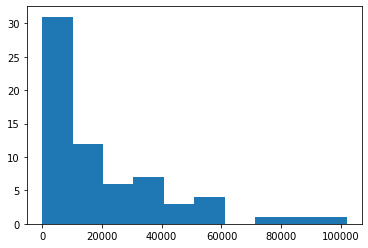

In [22]:
plt.hist(image.TotalSubmissions);

In [23]:
image = image[['CompetitionId', 'Title', 'HostSegmentTitle', 'OnlyAllowKernelSubmissions', 'year', 'RewardQuantity', 'TotalTeams',  'TotalSubmissions' ]]
image['subs_per_team'] = image.TotalSubmissions/image.TotalTeams

In [24]:
image.describe().to_csv('meta_data/meta/all_image_descriptives.csv')

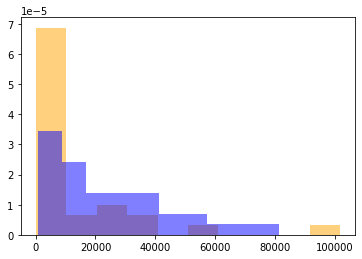

In [63]:
b = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000]

plt.hist(image[image.OnlyAllowKernelSubmissions==False].TotalSubmissions, alpha=0.5, bins=10, color='orange', density=True)
plt.hist(image[image.OnlyAllowKernelSubmissions].TotalSubmissions, alpha=0.5, bins=10, color='blue', density=True);
#Not sure this is meaningful actually.

In [100]:
df = pd.DataFrame(image[image.OnlyAllowKernelSubmissions].TotalSubmissions.copy()).reset_index(drop=True)
tdf = pd.DataFrame(image[image.OnlyAllowKernelSubmissions==False].TotalSubmissions.copy()).reset_index(drop=True)

df['Code'] = df['TotalSubmissions']
df['Traditional'] = tdf['TotalSubmissions']
df = df[['Code', 'Traditional']]

In [110]:
a = pd.DataFrame(32307,[1], columns = ['Code'])
a

,Code
1,32307


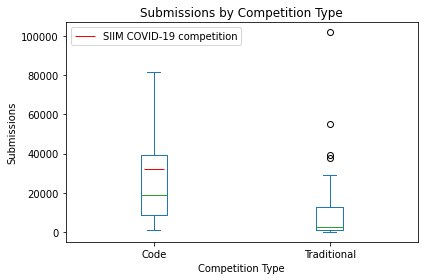

In [132]:
fig, ax = plt.subplots()
plt.plot(a, '_', color='r', markersize=20, label='SIIM COVID-19 competition')
df.plot(kind='box', title='Submissions by Competition Type', ax=ax)
ax.set_xlabel("Competition Type")
ax.set_ylabel("Submissions")
fig.tight_layout()
plt.legend()
plt.savefig('img/box.png');

In [76]:
36/66 #54% code comps in total, but they have only existed since 2019

0.5454545454545454

In [29]:
image['subs_per_team'] = image.TotalSubmissions/image.TotalTeams

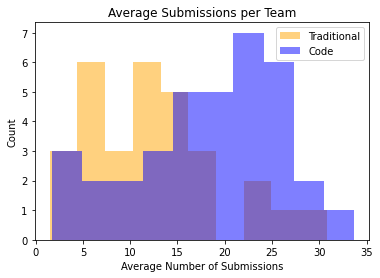

In [65]:
plt.hist(image[image.OnlyAllowKernelSubmissions==False].subs_per_team, alpha=0.5, bins=10, color='orange',label='Traditional')
plt.hist(image[image.OnlyAllowKernelSubmissions].subs_per_team, alpha=0.5, bins=10, color='blue', label='Code')
plt.title('Average Submissions per Team')
plt.legend()
plt.xlabel('Average Number of Submissions')
plt.ylabel('Count')
fig.tight_layout()
plt.savefig('img/submission_dist.png')

In [31]:
ccomps = image[image.OnlyAllowKernelSubmissions].copy().reset_index(drop=True)
ccomps = ccomps[['CompetitionId', 'Title', 'HostSegmentTitle', 'RewardQuantity', 'TotalTeams', 'TotalSubmissions', 'subs_per_team', ]]
ccomps.to_csv('meta_data/meta/image_code_comps.csv', index=False)

In [32]:
desc = ccomps.describe()
desc.to_csv('meta_data/meta/image_code_descriptives.csv')

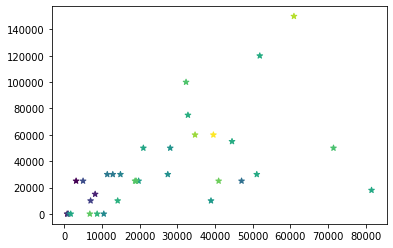

In [33]:
plt.scatter(ccomps.TotalSubmissions, ccomps.RewardQuantity, marker='*', c=ccomps.subs_per_team);

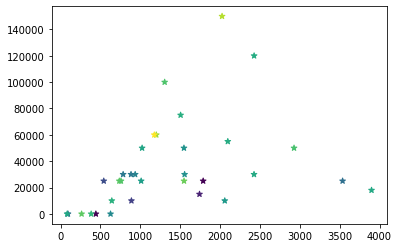

In [34]:
plt.scatter(ccomps.TotalTeams, ccomps.RewardQuantity, marker='*', c=ccomps.subs_per_team);

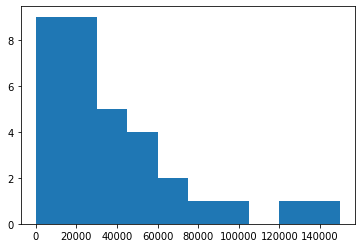

In [35]:
plt.hist(ccomps.RewardQuantity);

In [36]:
ccomps[['TotalSubmissions', 'TotalTeams', 'subs_per_team', 'RewardQuantity']].sort_values('subs_per_team', ascending=False)

,TotalSubmissions,TotalTeams,subs_per_team,RewardQuantity
30,39568,1175,33.674894,60000.0
29,60934,2025,30.090864,150000.0
16,34699,1200,28.915833,60000.0
24,40956,1548,26.457364,25000.0
26,6782,263,25.787072,0.0
10,18783,736,25.520380,25000.0
17,19058,757,25.175694,25000.0
23,32307,1305,24.756322,100000.0
5,71433,2928,24.396516,50000.0
27,8717,383,22.759791,0.0


In [37]:
ccomps.TotalSubmissions.describe() #wide range here

count       36.000000
mean     24894.416667
std      20839.013687
min        767.000000
25%       8584.500000
50%      18920.500000
75%      39087.250000
max      81524.000000
Name: TotalSubmissions, dtype: float64

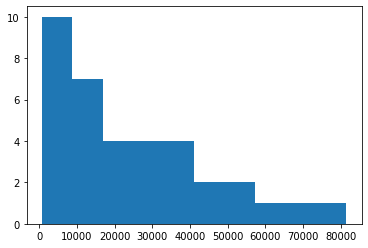

In [38]:
plt.hist(ccomps.TotalSubmissions);

In [39]:
ccomps.subs_per_team.describe() #mean lower than expected - do high scoring teams tend to submit more?

count    36.000000
mean     18.075550
std       7.912399
min       1.735294
25%      13.036124
50%      20.030006
75%      23.168972
max      33.674894
Name: subs_per_team, dtype: float64

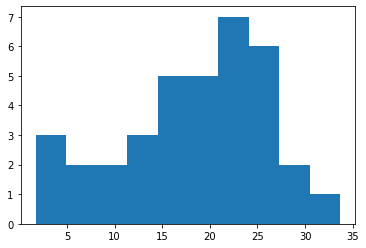

In [40]:
plt.hist(ccomps.subs_per_team);

In [41]:
ccomps.TotalTeams.describe()

count      36.000000
mean     1336.972222
std       896.393520
min        82.000000
25%       751.750000
50%      1187.500000
75%      1753.500000
max      3900.000000
Name: TotalTeams, dtype: float64

In [42]:
ccomps[['Title', 'TotalTeams', 'TotalSubmissions', 'subs_per_team', 'RewardQuantity']][ccomps.TotalSubmissions==max(ccomps.TotalSubmissions)] #max total submissions

,Title,TotalTeams,TotalSubmissions,subs_per_team,RewardQuantity
3,Cassava Leaf Disease Classification,3900,81524,20.90359,18000.0


In [43]:
ccomps[['Title', 'TotalTeams', 'TotalSubmissions', 'subs_per_team', 'RewardQuantity']][ccomps.TotalSubmissions==min(ccomps.TotalSubmissions)] #min total submissions

,Title,TotalTeams,TotalSubmissions,subs_per_team,RewardQuantity
1,iMet Collection 2019 - FGVC6,442,767,1.735294,0.0


In [44]:
ccomps[['Title', 'TotalTeams', 'TotalSubmissions', 'subs_per_team', 'RewardQuantity']][ccomps.subs_per_team==max(ccomps.subs_per_team)] #max avg submissions per team

,Title,TotalTeams,TotalSubmissions,subs_per_team,RewardQuantity
30,HuBMAP + HPA - Hacking the Human Body,1175,39568,33.674894,60000.0


In [45]:
ccomps[['Title', 'TotalTeams', 'TotalSubmissions', 'subs_per_team', 'RewardQuantity']][ccomps.subs_per_team==min(ccomps.subs_per_team)] #min avg submissions per team

,Title,TotalTeams,TotalSubmissions,subs_per_team,RewardQuantity
1,iMet Collection 2019 - FGVC6,442,767,1.735294,0.0


In [46]:
ccomps[ccomps.CompetitionId==26680][['TotalTeams', 'TotalSubmissions']].head(1) #get values for the SIIM competition

,TotalTeams,TotalSubmissions
23,1305,32307


In [47]:
subs['SubmissionId'] = subs['Id'] #rename and reduce this table
subs = subs[['SubmissionId', 'TeamId', 'SourceKernelVersionId', 'SubmissionDate', 'IsAfterDeadline','PublicScoreLeaderboardDisplay','PrivateScoreLeaderboardDisplay']]


In [48]:
siimteams = teams[teams.CompetitionId==26680]

In [49]:
hope = pd.merge(siimteams, subs, left_on='Id', right_on='TeamId', validate='1:m')

In [50]:
#isolated all submissions belonging to the SIIM.... competition
finalSiim = hope[(hope.TeamLeaderId.isna()==False) & (hope.IsAfterDeadline==False) & (hope.LastSubmissionDate.isna()==False)].copy()
print(finalSiim.shape[0]) #32307 submissions, which bloody matches finally!! Woot!
print(len(finalSiim.TeamId.unique())) #1307 teams, which matches expected
finalSiim.to_csv('meta_data/meta/SIIM_only_submissions.csv', index=False)

32307
1305


#### Now we have the relevant submissions, we would like to split them into teams that made a viable effort (and therefore had a higher carbon cost), ones that made some effort but maybe lacked the skills/tools/experience to do well, and teams that joined and didn't actually get very far, maybe were collecting data, or just didn't have time

In [51]:
finalSiim[finalSiim.Medal.isna()];

In [52]:
finalSiim.loc[finalSiim[finalSiim.Medal.isna()].index, 'Medal'] = 0

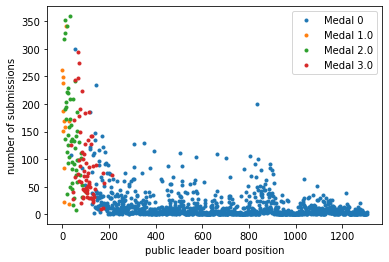

In [53]:
for i in [0, 1., 2., 3.]:
    temp_df = finalSiim[finalSiim.Medal == i]

    plt.plot(temp_df.groupby('TeamId').max().PublicLeaderboardRank,temp_df.groupby(by='TeamId').count().Id, '.', label=f'Medal {i}')
plt.ylabel('number of submissions')
plt.xlabel('public leader board position');
plt.legend();
#plt.xlim(0,200)
#plt.ylim(0,50);

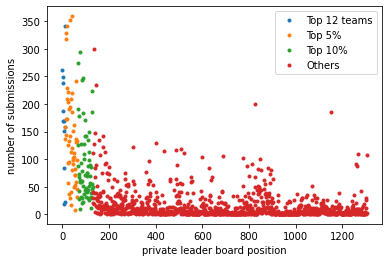

In [72]:
for i in [1., 2., 3., 0, ]:
    temp_df = finalSiim[finalSiim.Medal == i]
    if i == 0:
        l = 'Others'
    elif i == 3.0:
        l = 'Top 10%'
    elif i == 2.0:
        l = 'Top 5%'
    elif i == 1.0:
        l = 'Top 12 teams'
        
    plt.plot(temp_df.groupby('TeamId').max().PrivateLeaderboardRank,temp_df.groupby(by='TeamId').count().Id, '.', label=l)
plt.ylabel('Number of Submissions')
plt.xlabel('Private Leaderboard Position')
plt.title('Team Submissions and Final ')
plt.legend();
plt.savefig('img/totalsubsVsPrivateleaderpos.png')
#plt.xlim(0,200);

In [55]:
finalSiim[finalSiim.PublicScoreLeaderboardDisplay.isna()]

,Id,CompetitionId,TeamLeaderId,TeamName,ScoreFirstSubmittedDate,LastSubmissionDate,PublicLeaderboardSubmissionId,PrivateLeaderboardSubmissionId,IsBenchmark,Medal,...,PublicLeaderboardRank,PrivateLeaderboardRank,WriteUpForumTopicId,SubmissionId,TeamId,SourceKernelVersionId,SubmissionDate,IsAfterDeadline,PublicScoreLeaderboardDisplay,PrivateScoreLeaderboardDisplay
102,6815184,26680,2730705.0,BabaCondaRabbit -trust us,NaN,08/09/2021,22239050.0,22246346.0,False,2.0,...,25.0,19.0,263662.0,21719039,6815184,66642850.0,06/25/2021,False,NaN,NaN
103,6815184,26680,2730705.0,BabaCondaRabbit -trust us,NaN,08/09/2021,22239050.0,22246346.0,False,2.0,...,25.0,19.0,263662.0,21719259,6815184,66645651.0,06/25/2021,False,NaN,NaN
190,6815184,26680,2730705.0,BabaCondaRabbit -trust us,NaN,08/09/2021,22239050.0,22246346.0,False,2.0,...,25.0,19.0,263662.0,22288461,6815184,70870429.0,08/09/2021,False,NaN,NaN
192,6815184,26680,2730705.0,BabaCondaRabbit -trust us,NaN,08/09/2021,22239050.0,22246346.0,False,2.0,...,25.0,19.0,263662.0,22270558,6815184,70626721.0,08/08/2021,False,NaN,NaN
195,6815184,26680,2730705.0,BabaCondaRabbit -trust us,NaN,08/09/2021,22239050.0,22246346.0,False,2.0,...,25.0,19.0,263662.0,22287927,6815184,70863850.0,08/09/2021,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34910,7183047,26680,8049416.0,endiqq_our,NaN,08/09/2021,22294074.0,22294074.0,False,0.0,...,1132.0,1103.0,NaN,22280087,7183047,70748803.0,08/08/2021,False,NaN,NaN
34911,7183047,26680,8049416.0,endiqq_our,NaN,08/09/2021,22294074.0,22294074.0,False,0.0,...,1132.0,1103.0,NaN,22281969,7183047,70772462.0,08/09/2021,False,NaN,NaN
34914,7186326,26680,8048215.0,covidX,NaN,08/09/2021,22284466.0,22284466.0,False,0.0,...,1102.0,1096.0,NaN,22180462,7186326,69720630.0,08/02/2021,False,NaN,NaN
34915,7186326,26680,8048215.0,covidX,NaN,08/09/2021,22284466.0,22284466.0,False,0.0,...,1102.0,1096.0,NaN,22180592,7186326,69721285.0,08/02/2021,False,NaN,NaN


In [56]:
#more50 = list(finalSiim.groupby(by='TeamId').count()[(finalSiim.groupby(by='TeamId').count().Id > 2) & (finalSiim.groupby(by='TeamId').count().Id <= 100)].index)

#middle = finalSiim[finalSiim.TeamId.isin(more50)].copy()

more100 = list(finalSiim.groupby(by='TeamId').count()[finalSiim.groupby(by='TeamId').count().Id > 2].index)

serious = finalSiim[finalSiim.TeamId.isin(more100)].copy()

print(len(finalSiim)- len(serious), len(serious))
serious.head()

556 31751


,Id,CompetitionId,TeamLeaderId,TeamName,ScoreFirstSubmittedDate,LastSubmissionDate,PublicLeaderboardSubmissionId,PrivateLeaderboardSubmissionId,IsBenchmark,Medal,...,PublicLeaderboardRank,PrivateLeaderboardRank,WriteUpForumTopicId,SubmissionId,TeamId,SourceKernelVersionId,SubmissionDate,IsAfterDeadline,PublicScoreLeaderboardDisplay,PrivateScoreLeaderboardDisplay
12,6815181,26680,385905.0,Bo Peng,NaN,08/08/2021,22279112.0,22279112.0,False,0.0,...,222.0,223.0,NaN,22279112,6815181,70733396.0,08/08/2021,False,0.614,0.597
13,6815181,26680,385905.0,Bo Peng,NaN,08/08/2021,22279112.0,22279112.0,False,0.0,...,222.0,223.0,NaN,22279114,6815181,70733380.0,08/08/2021,False,0.613,0.596
14,6815181,26680,385905.0,Bo Peng,NaN,08/08/2021,22279112.0,22279112.0,False,0.0,...,222.0,223.0,NaN,22278279,6815181,70714266.0,08/08/2021,False,0.614,0.597
15,6815184,26680,2730705.0,BabaCondaRabbit -trust us,NaN,08/09/2021,22239050.0,22246346.0,False,2.0,...,25.0,19.0,263662.0,21224783,6815184,63694447.0,05/23/2021,False,0.230,0.000
16,6815184,26680,2730705.0,BabaCondaRabbit -trust us,NaN,08/09/2021,22239050.0,22246346.0,False,2.0,...,25.0,19.0,263662.0,21222058,6815184,63680617.0,05/23/2021,False,0.230,0.000


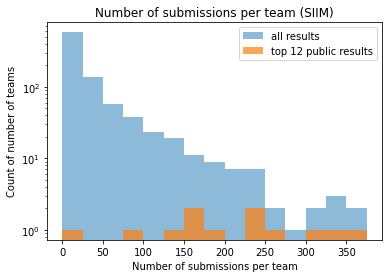

In [57]:
b = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375]
n = 12

plt.hist(serious.groupby(by='TeamId').count().Id, bins=b, log=True, alpha=0.5, label='all results')
plt.hist(serious[serious.PublicLeaderboardRank <=n].groupby('TeamId').count().Id, bins=b, log=True, alpha=0.7, label = f'top {n} public results')
plt.title('Number of submissions per team (SIIM)')
plt.xlabel('Number of submissions per team')
plt.ylabel('Count of number of teams')
plt.legend();

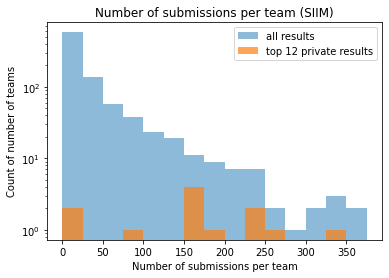

In [58]:
plt.hist(serious.groupby(by='TeamId').count().Id, bins=b, log=True, alpha=0.5, label='all results')
plt.hist(serious[serious.Medal ==1.].groupby('TeamId').count().Id, bins=b, log=True, alpha=0.7, label = f'top {n} private results')
plt.title('Number of submissions per team (SIIM)')
plt.xlabel('Number of submissions per team')
plt.ylabel('Count of number of teams')
plt.legend();

In [59]:
serious[serious.Medal==1.].groupby('TeamId').mean().sort_values('PrivateLeaderboardRank') ## These 12 medal==1

/tmp/ipykernel_450/3271615303.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  serious[serious.Medal==1.].groupby('TeamId').mean().sort_values('PrivateLeaderboardRank') ## These 12 medal==1


,Id,CompetitionId,TeamLeaderId,ScoreFirstSubmittedDate,PublicLeaderboardSubmissionId,PrivateLeaderboardSubmissionId,IsBenchmark,Medal,PublicLeaderboardRank,PrivateLeaderboardRank,WriteUpForumTopicId,SubmissionId,SourceKernelVersionId,IsAfterDeadline,PublicScoreLeaderboardDisplay,PrivateScoreLeaderboardDisplay
TeamId,,,,,,,,,,,,,,,,
6815503,6815503.0,26680.0,1393170.0,NaN,22115046.0,22138936.0,0.0,1.0,1.0,1.0,263658.0,2.178476e+07,6.719075e+07,0.0,0.562220,0.148776
6818936,6818936.0,26680.0,2545270.0,NaN,22271717.0,22280976.0,0.0,1.0,6.0,2.0,263674.0,2.184838e+07,6.759822e+07,0.0,0.419434,0.124403
6815267,6815267.0,26680.0,3460291.0,NaN,22286802.0,22286806.0,0.0,1.0,4.0,3.0,263654.0,2.175123e+07,6.699764e+07,0.0,0.383267,0.135102
6823597,6823597.0,26680.0,3574256.0,NaN,22280375.0,22280375.0,0.0,1.0,2.0,4.0,264243.0,2.182679e+07,6.751683e+07,0.0,0.547498,0.441562
6817202,6817202.0,26680.0,4712534.0,NaN,22154952.0,22286450.0,0.0,1.0,3.0,5.0,263945.0,2.193316e+07,6.818345e+07,0.0,0.568304,0.281775
6903817,6903817.0,26680.0,7574779.0,NaN,22274761.0,22274761.0,0.0,1.0,31.0,6.0,264858.0,2.196845e+07,6.846591e+07,0.0,0.551867,0.543400
6968613,6968613.0,26680.0,3613976.0,NaN,22285019.0,22285019.0,0.0,1.0,5.0,7.0,263748.0,2.204544e+07,6.894520e+07,0.0,0.377543,0.366318
6839557,6839557.0,26680.0,4940666.0,NaN,22285051.0,22286492.0,0.0,1.0,28.0,8.0,263734.0,2.195073e+07,6.829584e+07,0.0,0.367388,0.352347
6817029,6817029.0,26680.0,1424766.0,NaN,22285666.0,22285666.0,0.0,1.0,9.0,9.0,265583.0,2.208444e+07,6.923010e+07,0.0,0.477181,0.248916


Some teams do well even though they make relatively few submissions ~ Guessing they are doing significant work offline?